<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

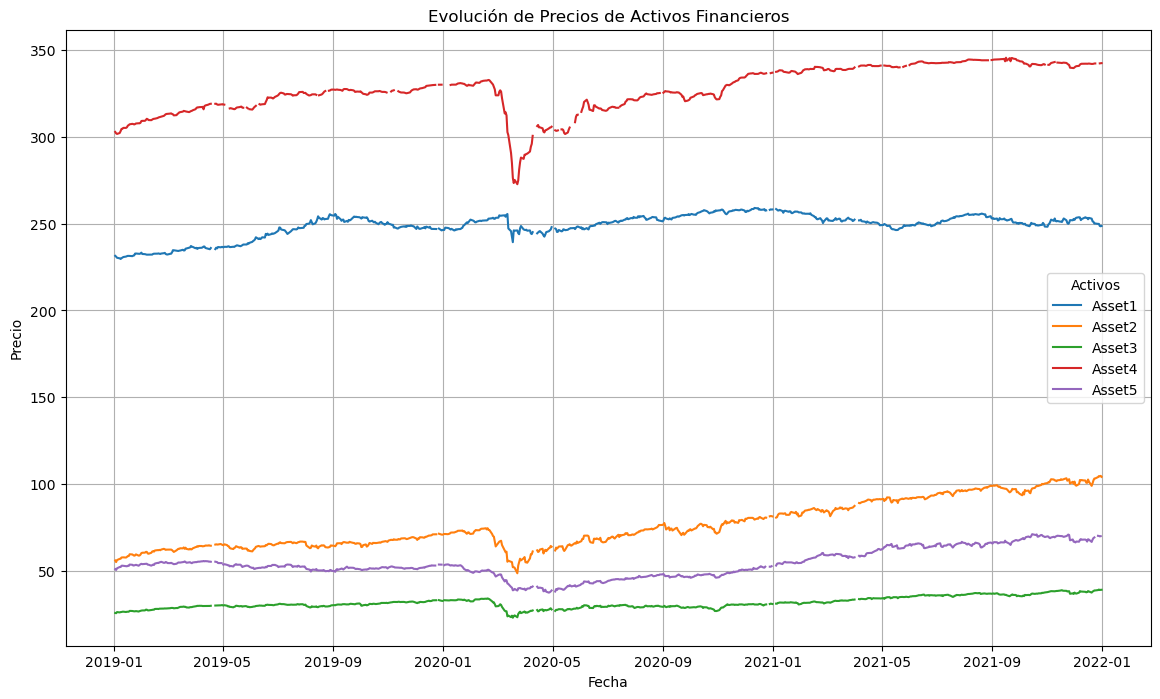

In [6]:
df = pd.read_csv('financial_assets_prices.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()
df.set_index('date', inplace=True)
plt.figure(figsize=(14, 8))
for asset in df.columns:
    plt.plot(df.index, df[asset], label=asset)

plt.title('Evolución de Precios de Activos Financieros')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(title="Activos")
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [9]:
returns = df.pct_change().dropna()

C:\Users\julyj\AppData\Local\Temp\ipykernel_7512\209980156.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [11]:
correlation_matrix = returns.corr()
print(correlation_matrix)

          Asset1    Asset2    Asset3    Asset4    Asset5
Asset1  1.000000 -0.088341 -0.061253  0.102252 -0.106484
Asset2 -0.088341  1.000000  0.852491  0.526634  0.591399
Asset3 -0.061253  0.852491  1.000000  0.511550  0.557414
Asset4  0.102252  0.526634  0.511550  1.000000  0.421155
Asset5 -0.106484  0.591399  0.557414  0.421155  1.000000


<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

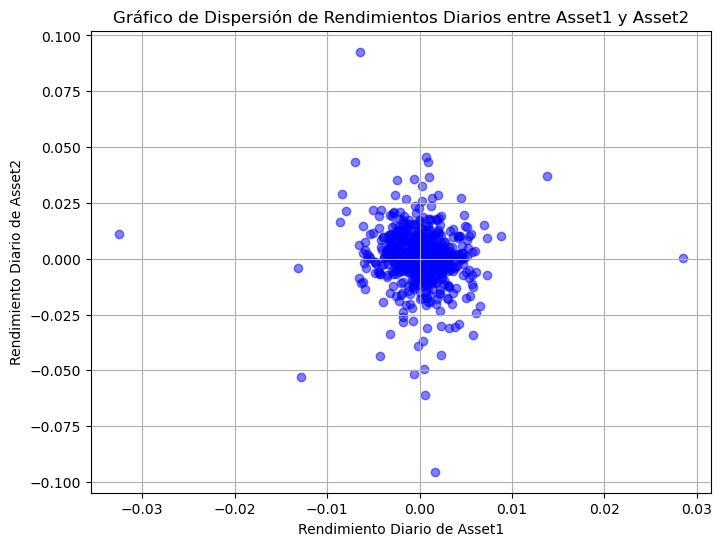

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(returns['Asset1'], returns['Asset2'], alpha=0.5, color='blue')
plt.title('Gráfico de Dispersión de Rendimientos Diarios entre Asset1 y Asset2')
plt.xlabel('Rendimiento Diario de Asset1')
plt.ylabel('Rendimiento Diario de Asset2')
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [36]:
weights_df = pd.read_csv('portfolio_weights.csv')
weights_df.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [17]:
import pandas as pd

In [18]:
weights_df['date'] = pd.to_datetime(weights_df['date'])

In [19]:
weights_df.set_index('date', inplace=True)

In [20]:
daily_returns = weights_df.pct_change()

In [21]:
num_assets = daily_returns.shape[1] 
weights = [1/num_assets] * num_assets

In [22]:
weights_df['Portfolio_Daily_Return'] = daily_returns.dot(weights)

In [23]:
weights_df['Cumulative_Return'] = (1 + weights_df['Portfolio_Daily_Return']).cumprod() - 1

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

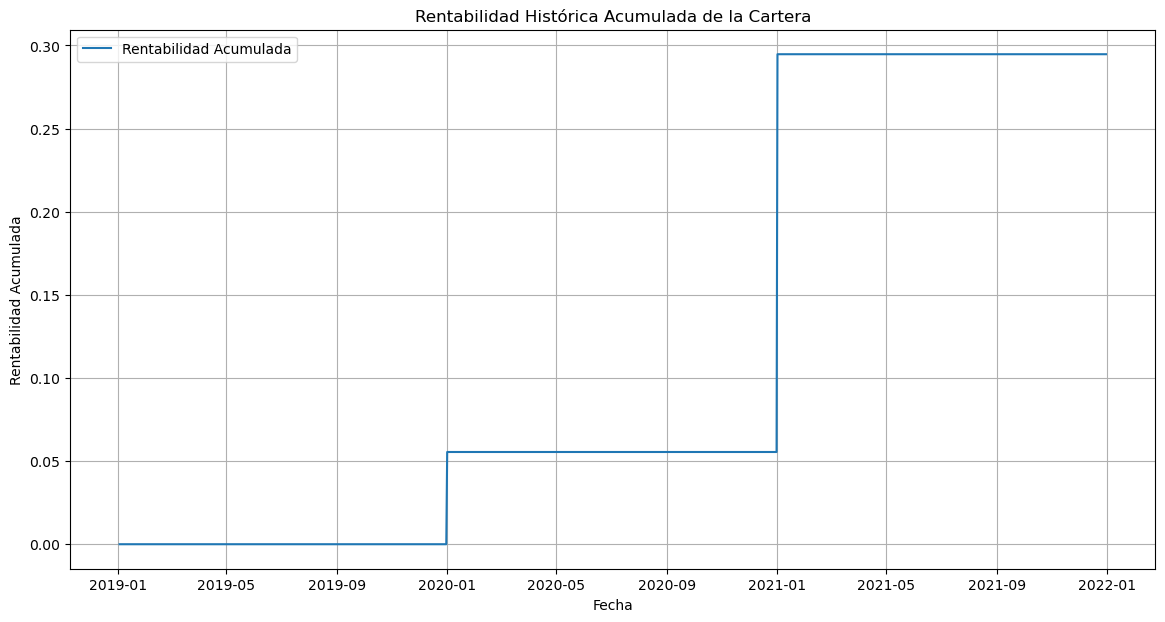

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(weights_df.index, weights_df['Cumulative_Return'], label='Rentabilidad Acumulada')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [46]:
def calcular_rentabilidad_anualizada(df, asset):
    valor_inicial = df[asset].iloc[0]
    valor_final = df[asset].iloc[-1]
    dias_totales = (df['date'].iloc[-1] - df['date'].iloc[0]).days
    años = dias_totales / 365.0
    rentabilidad_anualizada = ((valor_final / valor_inicial) ** (1 / años)) - 1
    return rentabilidad_anualizada

In [52]:
weights_df['date'] = pd.to_datetime(weights_df['date'])

In [54]:
rentabilidades = {}
for asset in weights_df.columns[1:]: 
    rentabilidades[asset] = calcular_rentabilidad_anualizada(weights_df, asset)


In [56]:
print(rentabilidades)


{'Asset1': -0.31891176373938934, 'Asset2': 0.3182070152277028, 'Asset3': -0.13974754214308482, 'Asset4': 0.13369664197588293, 'Asset5': -0.009546471686252889}


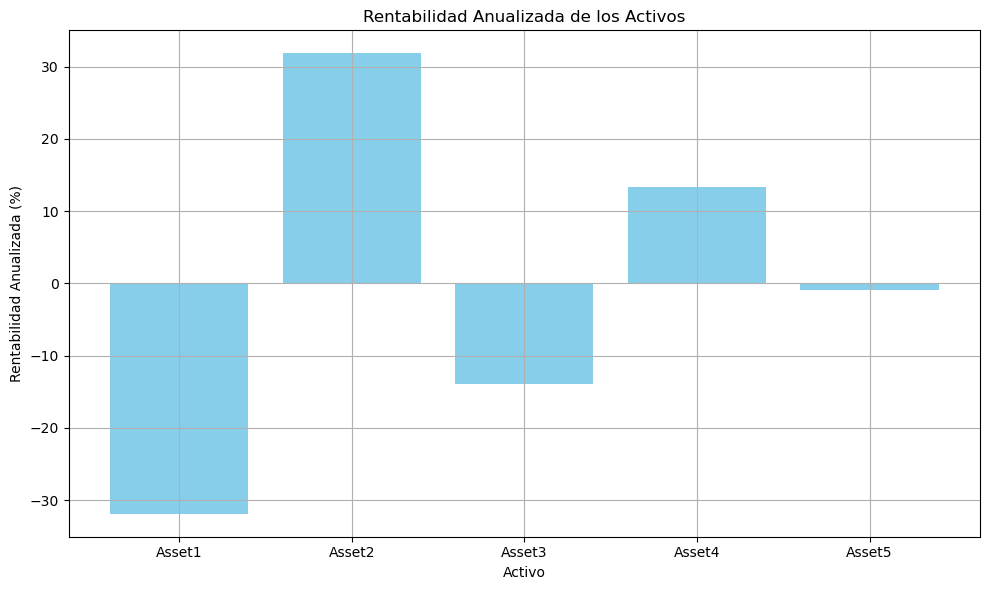

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(rentabilidades.keys(), [value * 100 for value in rentabilidades.values()], color='skyblue')
plt.title('Rentabilidad Anualizada de los Activos')
plt.xlabel('Activo')
plt.ylabel('Rentabilidad Anualizada (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [60]:
def calcular_volatilidad_anualizada(df, asset):
    rendimientos_diarios = df[asset].pct_change().dropna()
    volatilidad_diaria = rendimientos_diarios.std()
    volatilidad_anualizada = volatilidad_diaria * np.sqrt(252)
    return volatilidad_anualizada

In [62]:
volatilidades = {}
for asset in weights_df.columns[1:]:  
    volatilidades[asset] = calcular_volatilidad_anualizada(weights_df, asset)


In [64]:
print(volatilidades)

{'Asset1': 0.5042791146429902, 'Asset2': 0.6191748743253843, 'Asset3': 0.3655642129152658, 'Asset4': 0.4710074954565273, 'Asset5': 0.3348215699997598}


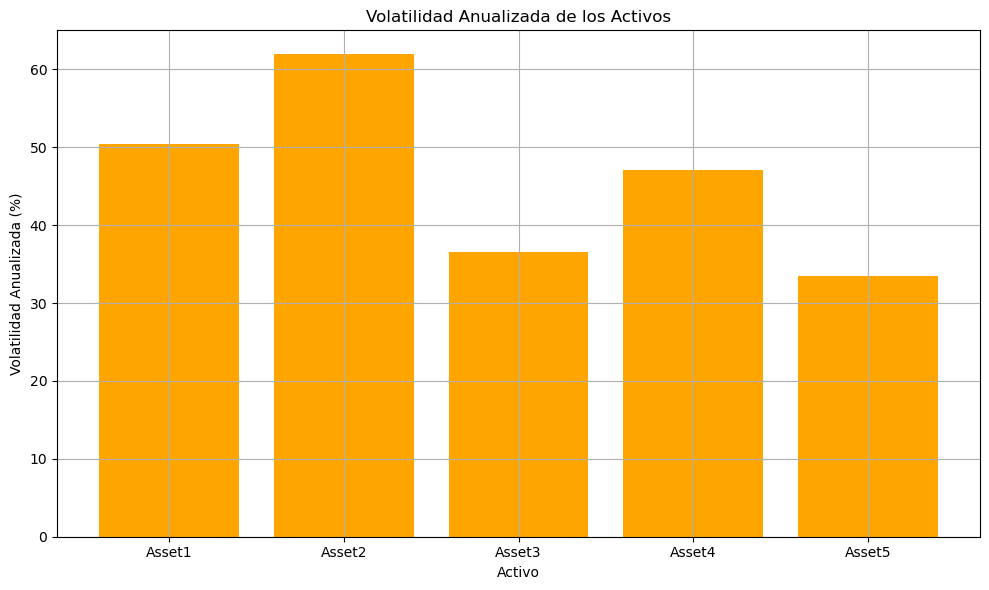

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(volatilidades.keys(), [value * 100 for value in volatilidades.values()], color='orange')
plt.title('Volatilidad Anualizada de los Activos')
plt.xlabel('Activo')
plt.ylabel('Volatilidad Anualizada (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>